### StatQuest: Decision Trees

[Link](https://www.youtube.com/watch?v=7VeUPuFGJHk)

A DT asks a question and classifies based on the answer

<img src = "./data/img/diag1.png" height="700" width = "700" align="center">

Note: A classification can be categories or numeric

In the 2nd case we are using mouse wtto predict mouse size

More complex DT:

<img src = "./data/img/diag2.png" height="700" width = "700" align="center">

It combines numeric data:

<img src = "./data/img/diag3.png" height="700" width = "700" align="center">

With Yes/No data:

<img src = "./data/img/diag4.png" height="700" width = "700" align="center">

Notice that cut-off for Resting heart rate need not be same on both sides

<img src = "./data/img/diag5.png" height="700" width = "700" align="center">

Also order of questions need not be same on both sides

The final classifications may be repeated

U start at top and go down till u get to a pt where u cant go further

Thats how a sample is classified

#### Raw table of data to DT:

We want to create a tree that uses **chest pain, good blood circulation, blocked artery status** to predict
**heart disease(y/n)**

We want to decide which of **chest pain, good blood circulation, blocked artery status** should be root node

<img src = "./data/img/diag6.png" height="700" width = "700" align="center">

We start off by exploring how well Chest pain classifies heart disease and build a tree as shown below:

<img src = "./data/img/diag7.png" height="700" width = "700" align="center">


We build similar trees for Good Blood Circulation and blocked Artery

<img src = "./data/img/diag8.png" height="700" width = "700" align="center">

As shown above we dont kno the BA status for this patient. We skip it but there are other alternatives

As there are missing values for a feature the total number of patients in each tree is diff

<img src = "./data/img/diag9.png" height="700" width = "700" align="center">


** because none of the leaf nodes are 100% YES Heart disease or 100% NO they all are considered as "impure"**

To determine which separation is best we need a way to measure and compare impurity

#### Gini method to measure impurity

Gini impurity (GI) is calculated for each leaf node as shown below:

<img src = "./data/img/diag10.png" height="700" width = "700" align="center">

Similarly we calculate GI for right leaf node

The leaf nodes do not reppresent same number of patients

Thus total GI for using Chest pain as root node is the weighted avg of GI of the 2 nodes:

<img src = "./data/img/diag11.png" height="700" width = "700" align="center">


Similarly we calculate GI for all 3 possible root nodes

<img src = "./data/img/diag12.png" height="700" width = "700" align="center">


Good blood circulation has lowest impurity and it separates the people with or without heart disease the best

So first node (root) = GBC

After the split we get 2 leaf nodes

Left: (37 y, 127 n)

Right: (100 y, 33 n)

Now we need to figure out how to separate (and if we should separate further) these patients in the Left and Right

**Lets start with left:**

These are the patients with GBC == true

Just like before we separate these patients based on CP and calculate GI as before

We do same for Blocked Artery

GI for BA = 2.9

This is less than GI for CP and also less than GI for GBC

<img src = "./data/img/diag13.png" height="700" width = "700" align="center">

Thus we use BA in the left part

Resulting tree:

<img src = "./data/img/diag14.png" height="700" width = "700" align="center">

Now we will use CP to try and separate the L->L node(24/25)

These are the patients with GBC = true and BA = true

CP does a good job in separating the patients:

<img src = "./data/img/diag15.png" height="700" width = "700" align="center">

Now we look at node in Root->L->R (13/102)

Lets try and use CP to divide these 115 patients

Note : ** Vast majority (89%) of patients in this node dont have heart disease**

<img src = "./data/img/diag16.png" height="700" width = "700" align="center">

After separating we get a higher GI than before separating

So we make this node a leaf node

<img src = "./data/img/diag17.png" height="700" width = "700" align="center">

We have built the entire LHS of the tree

<img src = "./data/img/diag18.png" height="700" width = "700" align="center">


For RHS we follow same steps:

1. Calculate all GI scores

2. If node otself has lowest score, then there is no point in separating and the node becomes a leaf node

3. If separating the data results in an improvement, pick the separation with the lowest impurity value

Complete tree:

<img src = "./data/img/diag18.1.png" height="700" width = "700" align="center">


#### Numeric data in DT:

Imagine if our features were numeric not just Y/N:

<img src = "./data/img/diag19.png" height="700" width = "700" align="center">

1. Sort patients by wt (lowest to highest)

<img src = "./data/img/diag20.png" height="700" width = "700" align="center">

2. Calculate avg wts for all adjacent patients

3. Calculate GI for each avg wt

<img src = "./data/img/diag21.png" height="700" width = "700" align="center">

In the above diag GI is calculated for wt < 167.5

4. The lowest GI occurs when wt < 205 (GI=0.27)

<img src = "./data/img/diag22.png" height="700" width = "700" align="center">


So this is the cutoff that we will use when we compare wt to CP or BA



#### DT with ranked data and multiple choice data

Ranked data is similar to numeric data, except that now we calculate impurity scores for **all possiblle ranks**

So if rank is from 1 to 4 (4 being best), we calculate impurity scores as:

- rank <= 1

- rank <= 2

- rank <= 3

We dont need <=4 as it includes everyone

When there are multiple choices like color choices - B, R or G we calculate GI for each one as well as each possible combination

- B

- G

- R

- B or G

- B or R

- G or R

We dont need to calculate for B or R or G as it includes everyone





### StatQuest: Random Forests Part 1 - Building, Using and Evaluating

[Link](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&t=143s)

DTs are easy to build, use and interpret

But in practice, theyare not that awesome

> Trees have one aspect that prevents them from being the ideal tool for predictive learning, namely **inaccuracy**

** They work great with the data used to create them but are not flexible when it comes to classifying
new samples**

RF combines simplicity of DTs with flexibility resulting in a vast improvement in accuracy


#### Step 1 : Create a "bootstrapped" dataset

<img src = "./data/img/diag23.png" height="700" width = "700" align="center">

Say these 4 samples are entire dataset

To create a bootstrapped dataset that is same size as original we randomly select samples from original dataset

**We are allowed to pick the same sample more than once**

Say first sample in original dataset = S1

We create bootstrap dataset as: **S2, S1, S4, S4**

<img src = "./data/img/diag24.png" height="700" width = "700" align="center">

#### Step 2: Create a DT using Bootstrapped dataset but only use a random subset of vars (columns) at each step

In this example we will consider 2 vars at each step

Thus instead of considering all 4 vars (CP, GBC, BA, Wt) to figure out how to split the root node we randomly select 2 : GBC, BA

Say GBC did the best job at separating the samples

We used GBC, we grey it out, so that we can focus on rem vars

<img src = "./data/img/diag25.png" height="700" width = "700" align="center">

Now we have to figure out how to select vars for circled node:

<img src = "./data/img/diag26.png" height="700" width = "700" align="center">

Just like for the root we randomly select 2 vars from (CP, BA, wt)

We select CP and wt

Thus we build the tree by: 

1. using the bootstrapped dataset

2. considering a random subset of vars at each step

This is done for a single tree

Now we make a new bootstrapped dataset and build tree considering a random subset of vars at each step

Ideally we do this 100s of times

considering a random subset of vars at each step

<img src = "./data/img/diag27.png" height="700" width = "700" align="center">


Because of the randomness associated with creating the bootsrapped dataset and also due to choosing random columns for each step, RF results in a ** wide variety of DTs**

This variety makes RF more effevtive that DTs



#### Now that we have created the RF, how do we use it?

First we get data of a new patient

We want to predict if Heart disease or not

We take data and run down 1st tree

Output: Yes

We keep track of this result

<img src = "./data/img/diag28.png" height="700" width = "700" align="center">

Similarly we run data thru 2nd... last tree

We keep track of the results and see which option received most votes

Here Yes: 5 No : 1

So conclusion : YES

**Bagging** : Bootstrapping the data plus using the aggregrate to make a decision is called Bagging


#### Test accuracy of a RF

When we created the bootstrapped dataset we allowed duplicate entries in the bootstrapped dataset

<img src = "./data/img/diag29.png" height="700" width = "700" align="center">

As a result above entry was not included in the bootstrapped dataset

> Typically about 1/3 the original data does not end up in the bootstrapped dataset

These entries are called the **Out-of-Bag Dataset**

We know the results of OoB data

Say there is only 1 entry in OoB data = No

we use them to test

We run the data through our first DT

Result : No

Similarly we run throuugh all trees and keep track of the results

Then we chose the most common result: Here it is correct and = No

<img src = "./data/img/diag30.png" height="700" width = "700" align="center">

We repeat the process for all OoB samples for all trees

Some may be incorrectly labeled

**Accuracy**: Proportion of OoB Samples that were correctly claasified by the RF

The proportion of OoB smaples that were incorrectly classified is the **OoB Error**


We now know how to:

- Build a RF

- Use a RF

- Estimate accuracy of RF

<img src = "./data/img/diag31.png" height="700" width = "700" align="center">

We used 2 vars to make a decision at each step

Now we can compare OoB Error for RF built using 2vars per step to a RF built using 3 vars per step

We can test many diff settings and chose the most accurate RF

Process:

1. Build a RF

2. Est accuracy of RF

3. Change no of vars used per step

4. Repeat for a number of times and chose the RF that is most accurate

Typically we start by using the square of number (sq root?) and then try a few settings above and below that value




### StatQuest: Random Forests Part 2: Missing data and clustering

[Link](https://www.youtube.com/watch?v=nyxTdL_4Q-Q)

Lets see how RF deals with missing data

Missing data can be of 2 types:

<img src = "./data/img/diag32.png" height="700" width = "700" align="center">

- Missing data can be in original dataset
- It may be in a new sample we want to categorize

Lets start with **Missing data in the original dataset**:

We want to create a RF from the data

But we dont know if the 4th patient has BA or what is their wt

We make an initial guess that mey be bad and gradually refine the guess until it (hopefully) gets good

Initial guess for BA = most common value = No

Since wt is numeric our initial guess is the median val = 180

<img src = "./data/img/diag33.png" height="700" width = "700" align="center">

This is the dataset with the initial guesses

Now we want to refine our guesses

We do this by ** detemining which samples are similar to the one with the missing data**

#### Determining Similarity:

1. Build a RF

2. Run all of the data down all of the trees

Lets start by running all of the data down the 1st tree:

<img src = "./data/img/diag34.png" height="700" width = "700" align="center">

Say sample 3 and 4 ended up in the same leaf node

That means they are **simialar (that is how similarity is defined in RF)**

We keep track of similar samples using a **Proximity Matrix**

The PM has a row foreach sample and a col for each sample

<img src = "./data/img/diag35.png" height="700" width = "700" align="center">

As samples 3 and 4 are similar we put 1 there

Similarly we run all of the data down the 2nd tree

<img src = "./data/img/diag36.png" height="700" width = "700" align="center">

Now samples 2, 3 and 4 all ended up in the same leaf nodes

PM now:

<img src = "./data/img/diag37.png" height="700" width = "700" align="center">

We add 1 as the pairs come in smae leaf node again

We run all the data down the 3rd tree

Updated PM:

<img src = "./data/img/diag38.png" height="700" width = "700" align="center">

Ultimately, we run the data down all the trees and the PM fills in

<img src = "./data/img/diag39.png" height="700" width = "700" align="center">

Then we divide each proximity value by total number of trees (say we had 10 trees)

Updated PM:

<img src = "./data/img/diag40.png" height="700" width = "700" align="center">

Now we can use the proximity values for sample 4 to make better guesses about the missing data


For BA we calculate the weighted freq of Y and N using prox values as wts

<img src = "./data/img/diag41.png" height="700" width = "700" align="center">

Calculations:

> Freq of Yes = 1/3

> Freq of No = 2/3

> The wighted freq of Yes = Freq of Yes * The weight for Yes

> The weight for Yes = (Proximity of Yes)/(All proximities)

<img src = "./data/img/diag42.png" height="700" width = "700" align="center">

> The proximity for Yes = Proximity value for sample 2 (the only one with Yes)

> We divide that by sum of proximities for sample 4

<img src = "./data/img/diag43.png" height="700" width = "700" align="center">

> The weight for Yes = 0.1/(0.1 + 0.1 + 0.8) = 0.1

> The wighted freq of Yes = 1/3 * 0.1 = 0.03

Similarly,

> The wighted freq of No = Freq of No * The weight for No

> The weight for No = (0.1 + 0.8)/(0.1 + 0.1 + 0.8) = 0.9

> The wighted freq of No = 2/3 * 0.9 = 0.6

Since No has a way higher wt freq we chose No

**So our new, improved revised guess based on proximities for BA is No**

** Filling in missing values for wt:**

For wt we use proximities to calculate a weighted avg



> Weighted avg = (wt of sample 1 * wt avg wt of sample 1) + (wt of sample 2 * wt avg wt of sample 2) + (wt of sample 3 * wt avg wt of sample 3)


> wt avg wt of sample 1 = (proximity of sample 1) / (sum of proximities) = 0.1 / (0.1 + 0.1 + 0.8) = 0.1

<img src = "./data/img/diag44.png" height="700" width = "700" align="center">


Similarly we calculate wt avg wt of sample 2 and wt avg wt of sample 3

> Weighted avg = (125 * 0.1) + (180 * 0.1) + (210 * 0.8) = 198.5

wts used to calculate the weighted avg is based on proximities

So we fill missing val as 198.5


<img src = "./data/img/diag45.png" height="700" width = "700" align="center">

Now that we have revised our guesses a little bit, we do the whole thing over again..

- we build a RF
- run data thru the trees
- recalculate proximities
- recalculate missing vals
- we do this 6 or 7 times until the missing values converge i.e. no longer change each time we recalculate

___

#### Super Cool stuff with the PM:

<img src = "./data/img/diag46.png" height="700" width = "700" align="center">


We have already seen this PM 

This is the PM b4 we divided each value by 10

If samples 3 and 4 ended up in the same leaf node for all 10 trees:

<img src = "./data/img/diag47.png" height="700" width = "700" align="center">

We divide each number by 10

For Samples 3 and 4 the entry will be 1

1 in PM => samples are as close as they can be

Also

1 - prox value = distance

<img src = "./data/img/diag48.png" height="700" width = "700" align="center">

Thus it is possible to derive a ** Distance Matrix ** from the PM

Getting distance matrix (which is similar to corr matrix) means we can plot **Heat Maps**

<img src = "./data/img/diag49.png" height="700" width = "700" align="center">

We can also draw **MDS Plots**

<img src = "./data/img/diag50.png" height="700" width = "700" align="center">

---

#### Missing data in new sample that we want to categorize

Imagine that we have already built a RF and we wanted to classify a new patient

But the patient has missing data for BA

<img src = "./data/img/diag51.png" height="700" width = "700" align="center">


We dont know if patient has BA

So we need to make a guess about BA so that we can run the patient down all the trees in the forest

1. Create 2 copies of the data (Yes and No for Heart Disease 

<img src = "./data/img/diag52.png" height="700" width = "700" align="center">

2. Then we use the iterative method discussed about to make a good guess about the misssing values

<img src = "./data/img/diag53.png" height="700" width = "700" align="center">

3. These are the guesses that we came up with:

<img src = "./data/img/diag54.png" height="700" width = "700" align="center">

4. Then we run the 2 samples down the trees in the forest

5. Then we see which of the 2 is correctly labeled by the RF most number of times

6. The sample which is correctly labeled more times wins

---

### StatQuest: Random Forests in R

[Link](https://www.youtube.com/watch?v=6EXPYzbfLCE)

In [106]:
# Import libraries:

library(ggplot2)

# cowplot improves ggplot2's default settings
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
library(cowplot)

library(randomForest)

In [107]:
# install.packages('cowplot', repos='http://cran.us.r-project.org')


We  are going to use heart disease dataset from UCI ML repo

In [108]:
url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

data <- read.csv(url, header = FALSE)

head(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


Lets label the cols:

[Data Manual](http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names)

Only 14 used
      -- 1. #3  (age)       
      -- 2. #4  (sex)       
      -- 3. #9  (cp)        
      -- 4. #10 (trestbps)  
      -- 5. #12 (chol)      
      -- 6. #16 (fbs)       
      -- 7. #19 (restecg)   
      -- 8. #32 (thalach)   
      -- 9. #38 (exang)     
      -- 10. #40 (oldpeak)   
      -- 11. #41 (slope)     
      -- 12. #44 (ca)        
      -- 13. #51 (thal)      
      -- 14. #58 (num)       (the predicted attribute)
      
3 age: age in years

4 sex: sex (1 = male; 0 = female)

9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
        
10 trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
        
12 chol: serum cholestoral in mg/dl

16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
                    
32 thalach: maximum heart rate achieved

38 exang: exercise induced angina (1 = yes; 0 = no)

40 oldpeak = ST depression induced by exercise relative to rest

41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
        
44 ca: number of major vessels (0-3) colored by flourosopy

51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
        

In [109]:
colnames(data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", 
                    "slope", "ca", "thal", "hd")

head(data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


str() function gives us the structure of the data

In [110]:
str(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : num  1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : num  1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : num  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : num  2 2 2 0 2 0 2 0 2 2 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : num  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : num  3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 5 levels "?","0.0","1.0",..: 2 5 4 2 2 2 4 2 3 2 ...
 $ thal    : Factor w/ 4 levels "?","3.0","6.0",..: 3 2 4 2 2 2 2 2 4 4 ...
 $ hd      : int  0 2 1 0 0 0 3 0 2 1 ...


Some of the cols are messed up

- sex is supposed to be a factor where 0: female and 1: male

- cp is supposed to be a factor where levels 1-3 represents diff types of pain and 4 represents no chest pain

- fbs is supposed to be a factor

- restecg is supposed to be a factor

- exang is supposed to be a factor

- slope is supposed to be a factor

- ca and thal are correctly called factors but one of the levels is "?" when we need it to be NA

#### Change "?" to NA:

In [111]:
data[data == '?'] <- NA

To make data easier on the eye, convert 0s in sex to F and 1s to M

Then convert the col into a factor

In [112]:
data[data$sex == 0,]$sex <- "F"

data[data$sex == 1,]$sex <- "M"

data$sex <- as.factor(data$sex)

head(data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
63,M,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,M,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,M,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,M,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,F,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,M,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


We convert the other cols into factors:

In [113]:
data$cp = as.factor(data$cp)
data$fbs = as.factor(data$fbs)
data$restecg = as.factor(data$restecg)
data$exang = as.factor(data$exang)
data$slope = as.factor(data$slope)


Since ca and thal cols had ? in them R took it to be a col of strings

We convert these cols to int then convert them as factors

In [114]:
data$ca <- as.integer(data$ca)
data$ca <- as.factor(data$ca)

data$thal <- as.integer(data$thal)
data$thal <- as.factor(data$thal)

Last thing is to make hd (heart disease as 0: Healthy, 1: Unhealthy)

In [115]:
data$hd <- ifelse(test = data$hd == 0, yes = "Healthy", no = "Unhealthy")

data$hd <- as.factor(data$hd)

In [116]:
head(data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
63,M,1,145,233,1,2,150,0,2.3,3,2,3,Healthy
67,M,4,160,286,0,2,108,1,1.5,2,5,2,Unhealthy
67,M,4,120,229,0,2,129,1,2.6,2,4,4,Unhealthy
37,M,3,130,250,0,0,187,0,3.5,3,2,2,Healthy
41,F,2,130,204,0,2,172,0,1.4,1,2,2,Healthy
56,M,2,120,236,0,0,178,0,0.8,1,2,2,Healthy


In [117]:
str(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : Factor w/ 2 levels "F","M": 2 2 2 2 1 2 1 1 2 2 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 4 levels "2","3","4","5": 1 4 3 1 1 1 3 1 2 1 ...
 $ thal    : Factor w/ 3 levels "2","3","4": 2 1 3 1 1 1 1 1 3 3 ...
 $ hd      : Factor w/ 2 levels "Healthy","Unhealthy": 1 2 2 1 1 1 2 1 2 2 ...


Since we are going to be randomly sampling things, lets set the seed for the random no generator so that we can reproduce our results

In [118]:
set.seed(42)

Now we impute values for the NAs in the dataset with **rfImpute()**

The 1st arg is **hd ~ . **

This means that we want the hd col to be predicted by the data in the other cols

data specifies the dataset

iter = 6: Here we specify how many RFs should rfImpute() build to estimate the mssing values

In theory, 4-6 iters are enough

Lastly, we save the results  i.e the dataset with imputed values instead of NAs as **data.imputed**

In [119]:
data.imputed = rfImpute(hd ~ ., data = data, iter = 6)

head(data)

ntree      OOB      1      2
  300:  17.49% 14.02% 21.58%
ntree      OOB      1      2
  300:  17.16% 13.41% 21.58%
ntree      OOB      1      2
  300:  17.49% 14.02% 21.58%
ntree      OOB      1      2
  300:  17.16% 13.41% 21.58%
ntree      OOB      1      2
  300:  17.16% 13.41% 21.58%
ntree      OOB      1      2
  300:  17.16% 13.41% 21.58%


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
63,M,1,145,233,1,2,150,0,2.3,3,2,3,Healthy
67,M,4,160,286,0,2,108,1,1.5,2,5,2,Unhealthy
67,M,4,120,229,0,2,129,1,2.6,2,4,4,Unhealthy
37,M,3,130,250,0,0,187,0,3.5,3,2,2,Healthy
41,F,2,130,204,0,2,172,0,1.4,1,2,2,Healthy
56,M,2,120,236,0,0,178,0,0.8,1,2,2,Healthy


After each iteration rfImpute() prints the Out-of-Bag(OOB) error rate

This should get smaller if the estimates are improving

Now that we have imputed the values, we build a RF

In [120]:
model <- randomForest(hd ~ ., data = data.imputed, proximity = TRUE)

The 1st arg is hd ~ .

This means that we want the hd col to be predicted by the data in the other cols

We also want randomForest() to return the PM

We will use this to cluster the samples

Lastly, we save the randomForest and asspciated data like PM as **model**

Get summary of RF and how well it performed:

In [121]:
model


Call:
 randomForest(formula = hd ~ ., data = data.imputed, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 16.5%
Confusion matrix:
          Healthy Unhealthy class.error
Healthy       141        23   0.1402439
Unhealthy      27       112   0.1942446

Type of random forest: classification

If we had used the RF to predict wt or ht it would say "regression"

If we had omitted the thing RF was supposed to predict entirely, it would say "unsupervised" 

Number of trees: 500: how many trees are in RF

No. of variables tried at each split: 3

- how many cols of data were considered at each internal node

Classification trees have a default setting of sq root of no of vars

Regression trees have a default setting of no of vars div by 3

OOB estimate of  error rate: 16.5% : This means that 83.5% of the OoB samples were correctly classified by the RF

Helthy Unhealthy class.error
Helthy       141        23   0.1402439
Unhealthy     27       112   0.1942446

This is the Confusion Matrix

In [122]:
head(model$err.rate)

OOB,Healthy,Unhealthy
0.2672414,0.1969697,0.3600000
0.2702703,0.2452830,0.3037975
0.2616034,0.2692308,0.2523364
0.2643678,0.2797203,0.2457627
0.2795699,0.2894737,0.2677165
0.2762238,0.2709677,0.2824427


In [123]:
nrow(model$err.rate)

[1] 500

Each row in model$err.rate reflects the error rates at diff stages of creating the RF

The 1st row contains error rates after making 1st tree

2nd row contains error rates after making 1st 2 trees

... and so on

last row contains error rates after making all 500 trees



We want to construct a df which has the type of error in the rows rather than the cols

In [124]:
print(rep(c(2,4), each = 4))

print(rep(c(2,4), times = 4))

[1] 2 2 2 2 4 4 4 4
[1] 2 4 2 4 2 4 2 4


Creating col: Type

In [125]:
Type = rep(c("OOB", "Healthy", "Unhealthy"), each = nrow(model$err.rate))

Type

[1] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
   [7] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
  [13] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
  [19] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
  [25] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
  [31] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
  [37] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
  [43] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
  [49] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
  [55] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
  [61] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
  [67] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
  [73] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
  [79] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
  [85] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
  [91] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
  [97] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [103] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [109] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [115] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [121] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [127] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [133] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [139] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [145] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [151] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [157] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [163] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [169] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [175] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [181] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [187] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [193] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [199] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [205] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [211] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [217] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [223] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [229] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [235] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [241] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [247] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [253] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [259] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [265] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [271] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [277] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [283] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [289] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [295] "OOB"       "OOB"       "OOB"       "OOB"       "OOB"       "OOB"      
 [301] "OOB"       "OOB"       "OOB"       "OOB"     

Creating col: Trees

In [126]:
Trees = rep(1:nrow(model$err.rate), times = 3)

Trees

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 [109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 [127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 [145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 [163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 [181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 [199] 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 [217] 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 [235] 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 [253] 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 [271] 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 [289] 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 [307] 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
 [325] 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
 [343] 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
 [361] 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378
 [379] 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396
 [397] 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414
 [415] 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432
 [433] 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450
 [451] 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468
 [469] 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486
 [487] 487 488 489 490 491 492 493 494 495 496 497 498 499 500   1   2   3   4
 [505]   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
 [523]  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
 [541]  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
 [559]  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
 [577]  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
 [595]  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 [613] 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 [631] 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 [649] 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 [667] 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 [685] 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 [703] 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 [721] 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 [739] 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 [757] 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274
 [775] 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292
 [793] 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310
 [811] 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328
 [829] 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346
 [847] 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364
 [865] 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382
 [883] 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400
 [901] 401 402 403 404 405 406 407 408 409 410 411 41

In [127]:
Error = c(model$err.rate[, "OOB"],
         model$err.rate[, "Healthy"],
         model$err.rate[, "Unhealthy"])

length(Error)

[1] 1500

Making the df:

In [128]:
oob.error.data <- data.frame(Trees = Trees, Type = Type, Error = Error)

head(oob.error.data)

nrow(oob.error.data)

Trees,Type,Error
1,OOB,0.2672414
2,OOB,0.2702703
3,OOB,0.2616034
4,OOB,0.2643678
5,OOB,0.2795699
6,OOB,0.2762238


[1] 1500

Now we plot this error

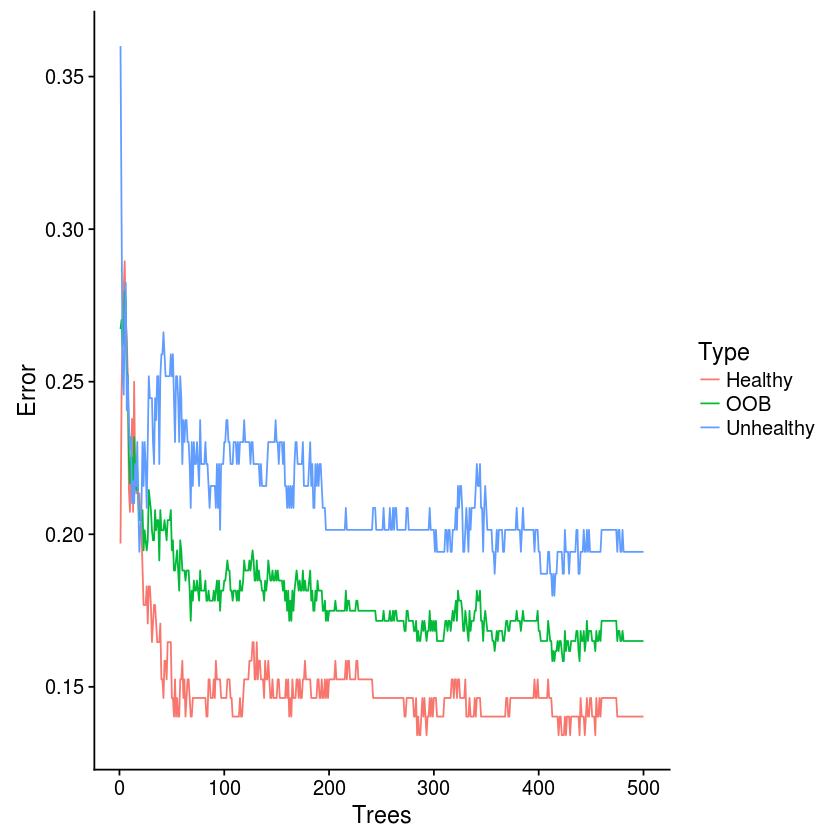

In [129]:
ggplot(data = oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color = Type))

The blue line shows the error rates while classifying **Unhealthy** patients

The green line shows the overall **OOB Error Rate**. So its in the middle (avg) of the 2

The red line shows the error rates while classifying **healthy** patients

We see in general the error rate dec when the RF has more trees

**If we added more trees would the error rate go down further?**

Lets make a RF with 1000 trees

In [130]:
model2 <- randomForest(hd ~ ., data = data.imputed, ntree = 1000, proximity = TRUE)

model2


Call:
 randomForest(formula = hd ~ ., data = data.imputed, ntree = 1000,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 16.5%
Confusion matrix:
          Healthy Unhealthy class.error
Healthy       142        22   0.1341463
Unhealthy      28       111   0.2014388

OOB error rate is same as before

And confusion matrix tells us we did no better than before

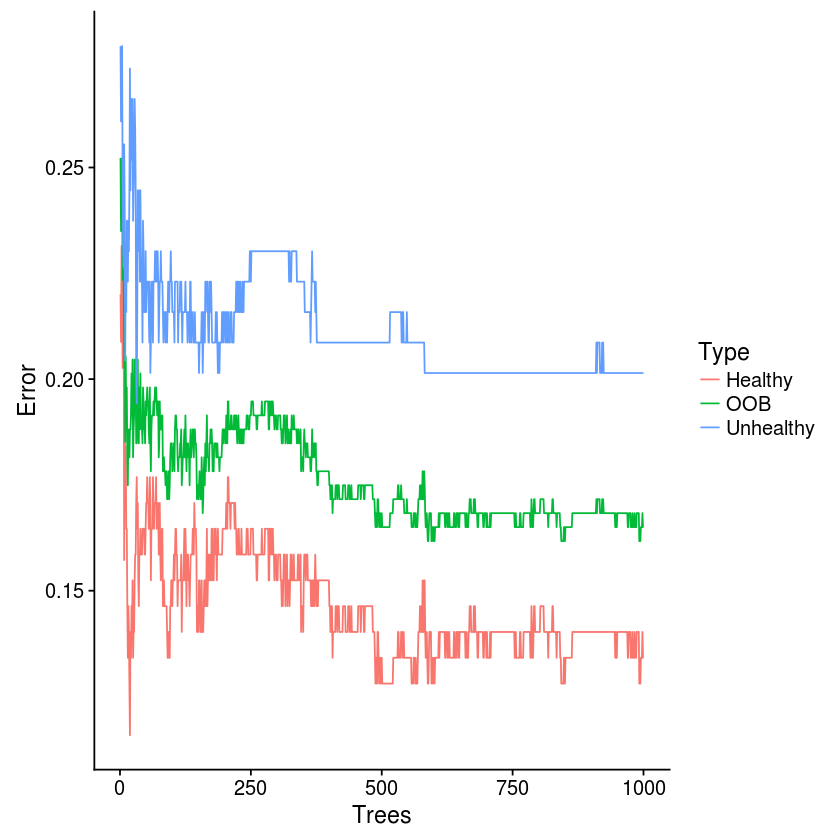

In [131]:
Type = rep(c("OOB", "Healthy", "Unhealthy"), each = nrow(model2$err.rate))
Trees = rep(1:nrow(model2$err.rate), times = 3)
Error = c(model2$err.rate[, "OOB"],
         model2$err.rate[, "Healthy"],
         model2$err.rate[, "Unhealthy"])

oob.error.data <- data.frame(Trees = Trees, Type = Type, Error = Error)

ggplot(data = oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color = Type))

The error rates stabilize right after 500 trees

So adding more trees would not help

But we would not have known this had we not added more trees

#### Optimal no of vars at each internal node

This is done using the param: mtry

In [132]:
# Create an empty vector:

oob.values = vector(length = 10)

for (i in 1: 10){
    
    # build an RF using "i" to determine no of vars to try at  each step
    
    temp.model = randomForest(hd ~ ., data = data.imputed, mtry = i, ntree = 1000)
    
    # print(temp.model)
    
    # reqd oob value is the 1st col (OOB) of last (after building 1000) tree
    
    oob.value <- temp.model$err.rate[nrow(temp.model$err.rate),1]
    
    # Stre OOB error rate for current model
    
    oob.values[i] <- oob.value
}

oob.values

[1] 0.1716172 0.1716172 0.1617162 0.1848185 0.1749175 0.1947195 0.1815182
 [8] 0.2013201 0.1881188 0.1947195

The 3rd value i.e no of vars = 3 is the optimal value

Coincidentally this is the default value